In [2]:
import pandas as pd
import numpy as np
import pandas_ta as ta
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout


In [3]:

# Step 1: Data cleaning
data = yf.download(tickers='BTC-usd', period='max', interval='1d')
data.dropna(inplace=True)
data
 

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2023-01-24,22929.626953,23134.011719,22549.744141,22636.468750,22636.468750,26405069715
2023-01-25,22639.267578,23722.099609,22406.076172,23117.859375,23117.859375,30685366709
2023-01-26,23108.955078,23237.078125,22911.373047,23032.777344,23032.777344,26357839322


In [4]:

data.drop([ 'Close'], axis=1, inplace=True)
data


,Open,High,Low,Adj Close,Volume
Date,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100
...,...,...,...,...,...
2023-01-24,22929.626953,23134.011719,22549.744141,22636.468750,26405069715
2023-01-25,22639.267578,23722.099609,22406.076172,23117.859375,30685366709
2023-01-26,23108.955078,23237.078125,22911.373047,23032.777344,26357839322


In [18]:
# Step 3: Data normalization (cont.)
scaler = MinMaxScaler()
data_close = data[['Adj Close']]
data_close = scaler.fit_transform(data_close)
data_close


array([[0.00414359],
       [0.00365546],
       [0.00321557],
       ...,
       [0.33914686],
       [0.33982874],
       [0.33900229]])

In [6]:
# Step 4: Splitting the data
X = data[['Open', 'High', 'Low', 'Volume']]
X = scaler.fit_transform(X)
y = data_close
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [7]:
# Step 5: Reshaping the data
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
print("x", X.shape)
print('y',y.shape)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('Y_test', y_test.shape) 
print('X_train.shape[1]', X_train.shape[1])
print('X_train.shape[2]', X_train.shape[2])


x (3056, 4)
y (3056, 1)
X_train (2444, 1, 4)
y_train (2444, 1)
X_test (612, 1, 4)
Y_test (612, 1)
X_train.shape[1] 1
X_train.shape[2] 4


In [15]:
# Step 6: Building the LSTM model (cont.)

model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True , activation= 'softmax'))
model.add(Dropout(0.2))
model.add(LSTM(100, activation= 'softmax'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 1, 100)            42000     
                                                                 
 dropout_2 (Dropout)         (None, 1, 100)            0         
                                                                 
 lstm_3 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 404       
                                                                 
Total params: 122,804
Trainable params: 122,804
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Step 7: Training and evaluating the model
history = model.fit(X_train, y_train, epochs=250, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/250
77/77 [==============================] - 6s 16ms/step - loss: 0.0321 - val_loss: 0.2096
Epoch 2/250
77/77 [==============================] - 1s 8ms/step - loss: 0.0294 - val_loss: 0.1993
Epoch 3/250
77/77 [==============================] - 1s 8ms/step - loss: 0.0294 - val_loss: 0.2009
Epoch 4/250
77/77 [==============================] - 1s 8ms/step - loss: 0.0293 - val_loss: 0.2021
Epoch 5/250
77/77 [==============================] - 1s 8ms/step - loss: 0.0294 - val_loss: 0.2026
Epoch 6/250
77/77 [==============================] - 1s 8ms/step - loss: 0.0294 - val_loss: 0.2035
Epoch 7/250
77/77 [==============================] - 1s 11ms/step - loss: 0.0293 - val_loss: 0.2001
Epoch 8/250
77/77 [==============================] - 1s 8ms/step - loss: 0.0294 - val_loss: 0.2024
Epoch 9/250
77/77 [==============================] - 1s 9ms/step - loss: 0.0293 - val_loss: 0.1989
Epoch 10/250
77/77 [==============================] - 1s 9ms/step - loss: 0.0293 - val_loss: 0.2011
Epoch 1

In [10]:
# Evaluate the model on the test set
score = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score:.4f}')


Test loss: 0.0008


In [11]:

# Step 8: Tuning the Hyperparameters
# You can use techniques such as grid search or random search to find the best values for the model's hyperparameters

# Step 9: Testing the model
y_pred = model.predict(X_test)
print('y_pred',y_pred.shape)
print('y_test',y_test.shape)
#y_pred = y_pred.reshape(-1,1)
#y_pred = np.nan_to_num(y_pred)
#y_pred = scaler.inverse_transform(y_pred)
#y_pred = scaler.inverse_transform(y_pred[:,[-1]])
#y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
#y_test = np.nan_to_num(y_test)


#evaluat
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = 100 * np.mean(np.abs((y_test - y_pred) / y_test))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("MAPE: {:.4f}%".format(mape))
print("RMSE: {:.4f}".format(rmse))
print("MSE: {:.4f}".format(mse))
print("MAE:{:.4f}".format(mae))


20/20 [==============================] - 1s 4ms/step
y_pred (612, 1)
y_test (612, 1)
MAPE: 3.6935%
RMSE: 0.0280
MSE: 0.0008
MAE:0.0207


In [12]:
def smape(y_true, y_pred):
    return 200 * np.mean(np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))

SMAPE1 = smape(y_test, y_pred)
print("smape: {:.4f}%".format(SMAPE1))


smape: 3.6783%


In [13]:
import matplotlib.pyplot as plt

# Assume that you have stored the date information in a variable called 'date'
# Assume that you have stored the predictions in a variable called 'y_pred'
# Assume that you have stored the test data in a variable called 'y_test'

# Plot the test data and predictions on a line chart
plt.plot(data['Date'], y_pred, label='Predictions')
plt.plot(data['Date'], y_test, label='Test Data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

KeyError: 'Date'

In [ ]:
y_pred = scaler.inverse_transform(y_pred)
#y_pred = scaler.inverse_transform(y_pred[:,[-1]])
#y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
print ('y_pred',y_pred)

ValueError: non-broadcastable output operand with shape (611,1) doesn't match the broadcast shape (611,4)

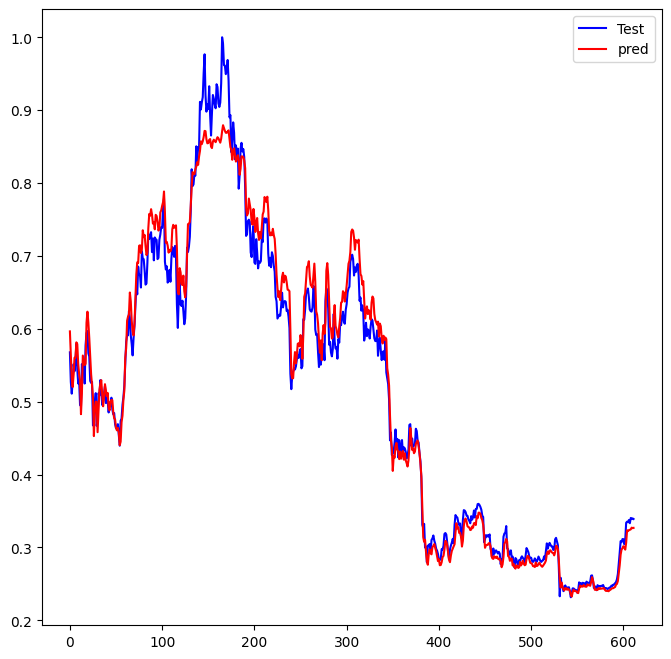

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.plot(y_test, color = 'blue', label = 'Test')
plt.plot(y_pred, color = 'red', label = 'pred')
plt.legend()
plt.show()